In [1]:
using CSV, DataFrames, Gadfly, Distributions, SparseArrays, LinearAlgebra

include("GMRF.jl");
include("grid.jl");
include("gibbs.jl");

# Création de la grille à 9 cellules

Chaque cellule est représentée par un triplet $[\mu, \sigma, \xi]$ indiquant les vraie valeur des paramètres de la GEV à déterminer.

In [2]:
# Seed
Random.seed!(400)
# Dimensions de la grille
m₁ = 6;
m₂ = 6;
# Nb total de cellules
m = m₁ * m₂
# Insuffisance de rang de la matrice de structure
r = 1;
# Hyperparamètres
κᵤ = 100.0;
# Matrice de structure
F = iGMRF(m₁, m₂, κᵤ);

In [3]:
grid_target = generateTargetGridV1(F);

In [4]:
grid_target[:, :, 1]

6×6 Matrix{Float64}:
  0.150578     0.125958   -0.00443581   0.0419361    0.000996108  -0.0601342
  0.213952     0.0870288   0.0466061   -0.0489566   -0.0310282    -0.0398228
  0.144839     0.0709377   0.0674184   -0.0783321   -0.0460267    -0.157605
 -0.00832208   0.0660304   0.084337    -0.00656615  -0.137013     -0.108068
  0.0790171    0.120558    0.0679903   -0.114431    -0.0765482    -0.0770912
  0.120752    -0.0833394   0.00551236  -0.0666542   -0.170395     -0.179677

# Génération de données

Le but est de générer des données sur chaque cellule à partir des paramètres de la GEV de la grille cible.

In [5]:
nobs = 1000
data = generateData(grid_target, nobs);

# Modèle 

In [6]:
include("gibbs.jl");

niter = 1000
δ² = 0.07
κᵤ₀ = 10
μ₀ = zeros(m)
W = buildStructureMatrix(m₁, m₂);

κᵤ, μ = gibbs(niter, data, δ²=δ², κᵤ₀=κᵤ₀, μ₀=μ₀, W=W);

θ = vcat(reshape(κᵤ, 1, niter), μ)

μ = θ[2:end, :];
κᵤ = θ[1, :];

# Suppression du temps de chauffe

warming_size = 200;

μ̂ = mean(θ[2:end, warming_size:end], dims=2);
κ̂ᵤ = mean(θ[1, warming_size:end]);


Taux d'acceptation μ1: 42.54 %
Taux d'acceptation μ2: 41.54 %
Taux d'acceptation μ3: 41.04 %
Taux d'acceptation μ4: 43.04 %
Taux d'acceptation μ5: 40.94 %
Taux d'acceptation μ6: 45.35 %
Taux d'acceptation μ7: 43.64 %
Taux d'acceptation μ8: 39.74 %
Taux d'acceptation μ9: 47.35 %
Taux d'acceptation μ10: 40.84 %
Taux d'acceptation μ11: 40.74 %
Taux d'acceptation μ12: 43.24 %
Taux d'acceptation μ13: 43.74 %
Taux d'acceptation μ14: 40.64 %
Taux d'acceptation μ15: 43.04 %
Taux d'acceptation μ16: 44.54 %
Taux d'acceptation μ17: 43.54 %
Taux d'acceptation μ18: 42.64 %
Taux d'acceptation μ19: 44.34 %
Taux d'acceptation μ20: 42.94 %
Taux d'acceptation μ21: 42.44 %
Taux d'acceptation μ22: 43.04 %
Taux d'acceptation μ23: 40.64 %
Taux d'acceptation μ24: 44.04 %
Taux d'acceptation μ25: 47.05 %
Taux d'acceptation μ26: 42.34 %
Taux d'acceptation μ27: 41.84 %
Taux d'acceptation μ28: 42.64 %
Taux d'acceptation μ29: 38.94 %
Taux d'acceptation μ30: 46.05 %
Taux d'acceptation μ31: 42.54 %
Taux d'acceptatio

In [7]:
reshape(μ̂, m₁, m₂)

6×6 Matrix{Float64}:
  0.135602    0.0868561  0.0149385   0.0320681  -0.00816827  -0.0541137
  0.157737    0.0762231  0.0141276  -0.0253102  -0.0737035   -0.0820238
  0.126106    0.0814518  0.0735383  -0.0508084  -0.0434185   -0.170256
 -0.0130778   0.0790708  0.109688   -0.0301324  -0.106064    -0.165523
  0.0622288   0.102693   0.0704761  -0.0925719  -0.0522894   -0.0958638
  0.0904971  -0.0687252  0.0267346  -0.0566551  -0.18369     -0.181448

In [8]:
grid_target[:, :, 1]

6×6 Matrix{Float64}:
  0.150578     0.125958   -0.00443581   0.0419361    0.000996108  -0.0601342
  0.213952     0.0870288   0.0466061   -0.0489566   -0.0310282    -0.0398228
  0.144839     0.0709377   0.0674184   -0.0783321   -0.0460267    -0.157605
 -0.00832208   0.0660304   0.084337    -0.00656615  -0.137013     -0.108068
  0.0790171    0.120558    0.0679903   -0.114431    -0.0765482    -0.0770912
  0.120752    -0.0833394   0.00551236  -0.0666542   -0.170395     -0.179677

Distance entre les deux matrices

In [9]:
norm(reshape(μ̂, m₁, m₂) .- grid_target[:, :, 1], 2) / m

0.004101092321175812

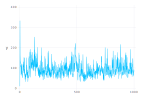

In [10]:
plot(y=κᵤ, Geom.line)

In [11]:
mean(κᵤ)

93.40734168266735

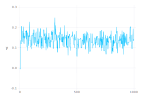

In [12]:
plot(y=μ[1, :], Geom.line)

In [13]:
using Mamba

sim = Chains(
    copy(θ'), 
    names=[
        "κᵤ", 
        "μ1",
        "μ2", 
        "μ3", 
        "μ4", 
        "μ5", 
        "μ6", 
        "μ7", 
        "μ8", 
        "μ9",
        "μ10",
        "μ11", 
        "μ12", 
        "μ13", 
        "μ14", 
        "μ15", 
        "μ16", 
        "μ17", 
        "μ18",
        "μ19",
        "μ20", 
        "μ21", 
        "μ22", 
        "μ23", 
        "μ24", 
        "μ25", 
        "μ26", 
        "μ27",
        "μ28",
        "μ29", 
        "μ30", 
        "μ31", 
        "μ32", 
        "μ33", 
        "μ34", 
        "μ35", 
        "μ36"
    ]
);

summarystats(sim)

        Mean          SD         Naive SE       MCSE         ESS   
 κᵤ 93.407341683 34.114915766 1.07880836004 3.4361801954  98.568182
 μ1  0.137140395  0.030031413 0.00094967666 0.0022514841 177.915484
 μ2  0.157623607  0.029429404 0.00093063948 0.0011574592 646.474722
 μ3  0.127681107  0.029071028 0.00091930661 0.0024865602 136.685615
 μ4 -0.011623095  0.028269177 0.00089394987 0.0025377072 124.091866
 μ5  0.061719896  0.029809794 0.00094266845 0.0013917667 458.759517
 μ6  0.088856549  0.029373183 0.00092886162 0.0016785169 306.232024
 μ7  0.087983817  0.033282237 0.00105247674 0.0021540862 238.725533
 μ8  0.075956407  0.027394939 0.00086630403 0.0022525010 147.914479
 μ9  0.082038693  0.028852031 0.00091238132 0.0015604666 341.856496
μ10  0.079666993  0.030367821 0.00096031483 0.0014259369 453.551577
μ11  0.102099703  0.030599335 0.00096763594 0.0011440558 715.368037
μ12 -0.066937000  0.028529913 0.00090219507 0.0018292444 243.252579
μ13  0.016212405  0.026502450 0.00083808105 0.00